# 导入需要的包

In [68]:
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import xgboost
import lightgbm
import torch
import joblib
import matplotlib.pyplot as plt

# 有孔虫数据获取

In [69]:
df_foram=pd.read_excel("data 24.10.xlsx")

In [70]:
df_foram

Sample  OTU_Num  Seqs_Num  Simpson  Shannon  OTU_Num.1  Seqs_Num.1  \
0    BC01       66     74087   0.9316   4.3345       3119       82203   
1    BC02       76     73427   0.9530   4.8383       1679       27096   
2    BC03      270     58713   0.9912   7.1257       2980       64809   
3    BC04      186     46790   0.9848   6.4862       3004       59672   
4    BC05       35     74023   0.9035   3.7690       2528       66269   
5    BC06       54     62764   0.9003   3.8180       1744       58056   
6    BC07       59     75267   0.9520   4.7416       2180       58706   
7    BC08      134     55465   0.9733   5.7605       2294       61749   
8    BC09      128     72684   0.9752   5.7693       1440       27315   
9    BC14      120     47742   0.9716   5.6585       1978      106865   
10   BC15      197     64204   0.9780   6.1761       1932       68619   
11   BC16      103     73303   0.9733   5.6183       2220       75547   
12   BC17      275     72147   0.8995   4.8847       3357       63758   
13   BC18       38     71363   0.8673   3.2042       1232       70644   
14   BC19       49     63476   0.8896   3.7358       2497      111540   
15  BC20a      116     71244   0.9588   5.0839       1166       71104   
16   BC21      534     69557   0.9951   8.0537       1280       70154   
17   BC22       43     75316   0.8789   3.8213       2065       63118   
18   BC23      155     71614   0.9760   5.8488       1197       70705   
19   BC24      265     64671   0.9756   6.0348       1725       67673   
20   BC25       51     74530   0.9285   4.1752       2729       64948   
21   BC26       91     71374   0.9419   4.6555       1109       71268   
22   BC27      263     66882   0.9838   6.5389       1506       68444   
23  BC28a      205     69737   0.9777   6.0704       3467       55877   
24   BC29       45     70216   0.9259   4.1693       2039       68259   
25  BC30a       81     71378   0.9254   4.4223       1644       68143   
26   BC31       42     72523   0.7339   2.3891       1074       72314   
27   BC32      191     69267   0.9668   5.7735       3304       46675   
28   BC33       61     72440   0.9255   4.0067       1480       68273   
29   BC34      112     75370   0.9490   5.0049       2658       85587   
30   BC35       88     72819   0.9399   4.6225       1130       71085   
31   BC36       81     73101   0.9384   4.5750       1404       69783   
32  BC37a      112     73318   0.9499   4.9631       1703       67005   
33   BC38      143     70578   0.9643   5.6389       3762       64238   
34  BC39a      219     70410   0.9680   5.9821       1534       67225   
35   BC40       56     72262   0.8446   3.3307       1430       70209   
36   BC41      127     72227   0.9739   5.7141       2129       61992   
37  BC42a       77     71579   0.8986   3.9202       2453       61905   
38   BC43      179     74268   0.9799   6.2051       2173       53851   
39   BC44       73     71718   0.7680   2.9013       2764       59844   
40  BC45a       98     48459   0.9658   5.2849       2293       74319   
41   BC46      148     70751   0.9701   5.4786       3568       53932   
42   BC47      372     61147   0.9821   6.5592       1683       55626   
43   BC49      187     60432   0.9753   5.7610       1509       60364   
44   BC50       83     71623   0.9191   4.4703       1596       70386   
45  BC52a      301     66759   0.9797   6.3447       1456       71234   
46   BC53       52     74086   0.9096   3.9089       1902       45480   
47   BC54      321     69289   0.9867   6.8065       1220       72744   

    Simpson.1  Shannon.1  OTU_Num.2  ...    Cr      Mn    Co     Ni     Cu  \
0      0.9949     9.8941         15  ...  72.6  5418.0  84.8  168.7  358.3   
1      0.9936     8.9821         20  ...  71.5  5148.3  81.1  163.8  336.3   
2      0.9957    10.0476         14  ...  72.3  4925.9  79.8  161.1  344.1   
3      0.9966    10.0321         22  ...  72.0  5117.4  79.0  163.0  327.4   
4      0.9963     9.8160         20

# 数据处理

In [71]:
x=df_foram.iloc[:,18:]

In [72]:
y=df_foram.iloc[:,13:18]

In [73]:
x

Grain Size    Sorting  Skewness  Kurtosis  Clay Content  Silt Content  \
0     12.294059  1.592055  0.317104  3.554550     31.398158     67.415671   
1     11.761052  1.657470  0.243071  3.161962     36.598290     63.219802   
2     11.848237  1.692610  0.218625  3.072894     38.122363     61.694958   
3     12.781535  1.688262  0.197828  3.260942     35.136972     63.274082   
4     18.893575  1.807599  0.244123  2.935882     27.004099     67.367831   
5     14.638691  1.727243  0.323801  3.036742     31.320763     67.428649   
6     12.525631  1.658387  0.320952  3.144105     33.812039     66.019635   
7     17.282901  1.665027  0.250258  3.378942     23.364111     72.027981   
8      9.895497  1.419717  0.667870  4.107633     30.308346     69.691654   
9     19.136067  1.610825  0.505378  3.518050     18.421154     77.611321   
10     7.290892  1.283591  1.003355  4.647995     35.778939     64.221061   
11     8.475590  1.219191  1.208773  5.249140     26.493589     73.506411   
12    11.395108  1.166567  1.434013  5.749668     16.053355     83.946645   
13     8.923427  1.201409  1.142003  5.004439     24.311645     75.688355   
14    13.531700  1.472414  0.371151  4.030684     22.538743     76.061632   
15     8.125761  1.273409  1.082763  4.791194     30.601607     69.398393   
16     8.870347  1.163002  1.223732  5.111804     23.003819     76.996181   
17     7.850949  1.263861  1.008693  4.546160     31.845855     68.154145   
18     8.304348  1.214640  1.163749  5.054572     27.203517     72.796483   
19    11.893638  1.610229  0.342540  3.366253     33.435220     66.420803   
20     8.902244  1.492192  0.511798  3.673258     38.609228     61.390772   
21     8.155408  1.332667  0.954603  4.550714     32.956026     67.043974   
22    10.125268  1.267854  1.086791  5.072596     22.623113     77.376887   
23     8.007555  1.276657  1.010225  4.491248     31.408812     68.591188   
24    11.790302  1.676273  0.260824  3.151481     37.290675     62.565998   
25    12.397404  1.647300  0.313737  3.256329     33.744244     66.071725   
26    11.902598  1.367357  0.552170  4.521891     21.861875     78.004504   
27    11.874789  1.595313  0.314601  3.459181     32.772264     67.048572   
28    16.300460  1.712413  0.236427  3.243852     27.331759     68.598878   
29     9.810270  1.281980  1.025545  4.883068     24.452679     75.547321   
30     8.156377  1.321426  0.935640  4.380102     32.910943     67.089057   
31     7.556560  1.293693  0.980202  4.495016     34.814602     65.185398   
32    10.378953  1.129934  1.382037  6.073610     16.957543     83.042457   
33     8.078349  1.204906  1.143120  4.879962     28.084931     71.915069   
34     9.020802  1.528035  0.403723  3.476056     40.416542     59.583458   
35     9.714969  1.515298  0.461548  3.608655     36.254456     63.745544   
36     8.419310  1.302760  1.024540  4.735372     30.411871     69.588129   
37    50.365814  2.269172  0.368156  2.218220     19.835033     47.960512   
38     8.021809  1.298090  1.002081  4.536312     32.455424     67.544576   
39     8.047932  1.217806  1.210239  5.277507     28.366334     71.633666   
40    13.278387  1.625955  0.456252  3.333495     29.713299     70.115915   
41    17.616671  1.746965  0.213587  3.121023     26.477204     68.712447   
42     7.895010  1.304767  1.021236  4.622378     33.178589     66.821411   
43     9.069078  1.508716  0.535028  3.684557     38.277217     61.722783   
44    10.729799  1.584446  0.358531  3.388344     35.947447     63.971017   
45    11.068998  1.584509  0.393404  3.469272     34.595777     65.317122   
46    18.057687  1.650042  0.044748  3.512681     22.173339     70.254831   
47     7.263195  1.317189  0.852135  4.339974     38.022600     61.977400   

    Sand Content  Chlorophyll a         N         C  ...    Cr      Mn    Co  \
0       1.186170       0.144663  0.390225  0.893534  ...  72.6  5418.0  84.8   
1       0.181908       0.163568  0.316253  0.865771  ...  71.5  5148.3

In [74]:
y

reads  OTUs   shannon   simpson    margalef
0   126441   608  5.704594  0.923086   71.907576
1    60792   597  5.853075  0.929498   70.604473
2    46437   606  5.951954  0.936173   71.670648
3    25337   562  5.626620  0.926991   66.458238
4    46057   536  5.789573  0.930533   63.378177
5    45538   520  5.674651  0.937884   61.482755
6    52150   533  5.902612  0.940871   63.022785
7    46752   578  5.844267  0.933378   68.353660
8    54241   615  6.008386  0.939767   72.736823
9    65744   593  5.775839  0.931041   70.130618
10  609678   609  6.023606  0.941830   72.026040
11  247258   573  5.733132  0.931661   67.761340
12   31861   616  5.657499  0.923580   72.855287
13   71127   702  6.282958  0.947800   83.043181
14  191555   583  6.049726  0.953029   68.945979
15   64200   708  6.075866  0.936790   83.753964
16   44884   595  5.882472  0.938000   70.367546
17  408291   582  5.762837  0.934504   68.827515
18  342257   606  5.876842  0.936590   71.670648
19   60386   605  5.765434  0.929104   71.552184
20   72658   623  5.920399  0.936670   73.684534
21  142653   626  5.722274  0.925897   74.039926
22  103413   516  5.869457  0.937630   61.008899
23   43821   557  5.006569  0.854738   65.865918
24   65965   706  6.030146  0.926012   83.517036
25   60278   656  5.982863  0.931755   77.593842
26   63247   813  6.412817  0.943906   96.192672
27   83098   727  6.117185  0.930184   86.004778
28   49823   643  5.875788  0.927591   76.053812
29   45675   372  5.414445  0.917964   43.950100
30   53322   389  5.750118  0.948774   45.963986
31   56252   342  5.123460  0.939086   40.396184
32   86423   414  5.586066  0.939646   48.925583
33    9706   616  5.565291  0.912848   72.855287
34   71056   594  5.476560  0.907238   70.249082
35   63105   641  5.796183  0.925158   75.816884
36   49770   693  5.951160  0.930492   81.977006
37   44191   717  5.964053  0.931115   84.820139
38   61099   609  5.545605  0.917517   72.026040
39   65717   644  5.820581  0.927268   76.172276
40   47000   670  5.730624  0.919054   79.252337
41   68512   684  6.202237  0.937046   80.910831
42   65151   703  6.255609  0.940309   83.161645
43    4635   848  6.685304  0.950475  100.338908
44   50636  1075  6.890970  0.942937  127.230209
45   51302   688  6.142626  0.933020   81.384687
46   73742   893  6.646802  0.944050  105.669782
47   63441   901  6.594357  0.941670  106.617493

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22, test_size=0.15)

In [76]:
transfer=StandardScaler()

In [77]:
x_train=transfer.fit_transform(x_train)
x_test=transfer.transform(x_test)

In [78]:
x_train

array([[-0.02576802, -0.52815097, -0.22924381, ..., -0.30614291,
        -0.3379647 ,  1.3132499 ],
       [-0.04592172,  0.76591369, -1.07548294, ...,  1.09984676,
         0.54753232, -0.7731844 ],
       [-0.43608502,  0.18856476, -0.63565574, ...,  0.51023819,
         1.33857633,  0.18978527],
       ...,
       [ 0.02996912,  0.47412739, -0.87279763, ...,  0.46488368,
         0.15201032, -1.06207531],
       [-0.19275394,  0.44018708, -0.75937971, ..., -0.1700794 ,
        -0.22580174, -0.37194704],
       [ 0.96962407,  1.43557508, -1.0726027 , ..., -0.62362445,
        -0.76300327, -0.08305613]])

In [79]:
pca=PCA(n_components=0.85,random_state=22)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
x_train_pca.shape

(40, 8)


# 模型创建、训练与评估

In [80]:
x.describe()

Grain Size     Sorting   Skewness   Kurtosis  Clay Content  \
count    48.000000  48.000000  48.000000  48.000000     48.000000   
mean     11.827604   1.467525   0.673390   4.045412     29.972842   
std       6.539962   0.228462   0.395932   0.857827      6.186014   
min       7.263195   1.129934   0.044748   2.218220     16.053355   
25%       8.267355   1.280649   0.319990   3.358064     25.971073   
50%      10.252111   1.482303   0.523413   3.857621     31.359461   
75%      12.429461   1.647985   1.022062   4.669839     34.650483   
max      50.365814   2.269172   1.434013   6.073610     40.416542   

       Silt Content  Sand Content  Chlorophyll a          N          C  ...  \
count     48.000000     48.000000      48.000000  48.000000  48.000000  ...   
mean      68.570048      1.457110       0.171463   0.244822   0.592608  ...   
std        6.373160      4.856699       0.019010   0.083767   0.226562  ...   
min       47.960512      0.000000       0.125988   0.172524   0.423285  ...   
25%       64.944314      0.000000       0.158700   0.190902   0.462278  ...   
50%       67.486613      0.000000       0.170490   0.211567   0.485589  ...   
75%       71.943297      0.183017       0.182433   0.237104   0.543684  ...   
max       83.946645     32.204455       0.217783   0.447826   1.179979  ...   

             Cr           Mn         Co          Ni          Cu          Zn  \
count  48.00000    48.000000  48.000000   48.000000   48.000000   48.000000   
mean   70.88750  4906.739583  79.945833  158.485417  341.412500  132.704167   
std     3.88815   593.917495   3.594319   20.836190   20.521702    3.970474   
min    56.00000  2856.600000  70.100000  101.000000  321.000000  115.800000   
25%    69.47500  4701.300000  78.075000  152.450000  330.150000  130.575000   
50%    71.50000  4871.400000  79.700000  157.200000  337.300000  133.050000   
75%    73.17500  5037.650000  81.250000  161.650000  344.375000  134.850000   
max    76.50000  7715.100000  91.300000  273.300000  448.200000  141.600000   

              Ga         As         Rb        Depth  
count  48.000000  48.000000  48.000000    48.000000  
mean   24.404167   3.835417  63.712500  5305.895833  
std     2.631233   2.200047  16.304883    68.200967  
min    20.000000   0.000000  27.500000  5155.000000  
25%    22.225000   2.175000  52.575000  5256.750000  
50%    23.950000   4.200000  64.350000  5312.500000  
75%    26.425000   5.475000  76.000000  5356.250000  
max    29.500000   7.200000  90.600000  5412.000000  

[8 rows x 35 columns]

In [81]:
y.describe()

reads         OTUs    shannon    simpson    margalef
count      48.000000    48.000000  48.000000  48.000000   48.000000
mean    90764.104167   630.979167   5.902531   0.931712   74.629777
std    106717.469249   130.528629   0.359095   0.014825   15.462928
min      4635.000000   342.000000   5.006569   0.854738   40.396184
25%     46938.000000   581.000000   5.728537   0.927199   68.709051
50%     60945.500000   612.000000   5.872623   0.933199   72.381432
75%     71509.750000   689.250000   6.035041   0.939676   81.532766
max    609678.000000  1075.000000   6.890970   0.953029  127.230209

## 随机森林模型

In [82]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]
params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}
#模型构建
rf=RandomForestRegressor()
rfgs=GridSearchCV(rf,params_grid,cv=5,scoring="neg_root_mean_squared_error")
#模型训练和评估
rfgs=RandomForestRegressor(random_state=22,bootstrap=True,max_depth=5,max_features="sqrt",min_samples_leaf=10,min_samples_split=10,n_estimators=100)
score_rfgs=[]
rfgs.fit(x_train,y_train)
y_pred_rfgs=rfgs.predict(x_test)
mae=mean_absolute_error(y_test,y_pred_rfgs,multioutput="raw_values")
mape=mean_absolute_percentage_error(y_test,y_pred_rfgs,multioutput="raw_values")
mse=mean_squared_error(y_test,y_pred_rfgs,multioutput="raw_values")
rmse=mean_squared_error(y_test,y_pred_rfgs,squared=False,multioutput="raw_values")
score_rfgs=pd.DataFrame([mae,mape,mse,rmse])
# param_rf=rfgs.best_params_
# print(param_rf)
score_rfgs

0             1         2         3           4
0  4.957956e+04     95.543617  0.204291  0.007782   11.318468
1  2.260890e+00      0.212110  0.035868  0.008361    0.212595
2  3.430534e+09  16989.534123  0.053772  0.000103  238.425876
3  5.857076e+04    130.343907  0.231887  0.010164   15.441045

In [83]:
#模型可解释
shap.initjs()
rfgs=RandomForestRegressor(random_state=22,bootstrap=True,max_depth=5,max_features="sqrt",min_samples_leaf=10,min_samples_split=10,n_estimators=100)
rfgs.fit(x_train,y_train)
fig=plt.figure(figsize=(20,10),dpi=300)
explainer = shap.KernelExplainer(rfgs.predict,x_train)
shap_values = explainer(x_train)
data_rfgs=shap_values.data
shap_rfgs=shap_values.values
# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0,::,0],show=False)
# shap.summary_plot(shap_values[::,::,0],x_train)
# shap_mean=shap_values.mean(axis=2)
# shap_values.values[::,::,0]=shap_mean.values
# shap.plots.bar(shap_values[::,::,0])
# import seaborn as sns
# shap.plots.beeswarm(shap_values[::,::,0],show=False)
# sns.palplot(sns.color_palette("Accent"))
# plt.show()
# plt.savefig("waterfall_knngs.pdf",bbox_inches = 'tight')

  0%|          | 0/40 [00:00<?, ?it/s]

<Figure size 6000x3000 with 0 Axes>

In [84]:
#shap_mean

In [85]:
#data_rfgs

In [86]:
#shap_rfgs

In [87]:
#模型构建
rf=RandomForestRegressor(random_state=22)
rfgspca=GridSearchCV(rf,params_grid,cv=5,scoring="neg_root_mean_squared_error")
#模型训练和评估
score_rfgspca=[]
rfgspca=RandomForestRegressor(random_state=22,bootstrap=True,max_depth=2,max_features="sqrt",min_samples_leaf=10,min_samples_split=2,n_estimators=100)
rfgspca.fit(x_train_pca,y_train)
y_pred_rfgspca=rfgspca.predict(x_test_pca)
mae=mean_absolute_error(y_test,y_pred_rfgspca,multioutput="raw_values")
mape=mean_absolute_percentage_error(y_test,y_pred_rfgspca,multioutput="raw_values")
mse=mean_squared_error(y_test,y_pred_rfgspca,multioutput="raw_values")
rmse=mean_squared_error(y_test,y_pred_rfgspca,squared=False,multioutput="raw_values")
score_rfgspca=pd.DataFrame([mae,mape,mse,rmse])
# param_rfpca=rfgspca.best_params_
# print(param_rfpca)
score_rfgspca

0             1         2         3           4
0  4.594127e+04     94.496517  0.206591  0.007900   11.194424
1  2.174967e+00      0.209879  0.036250  0.008495    0.210360
2  3.075643e+09  16722.390468  0.054037  0.000108  234.676864
3  5.545848e+04    129.315082  0.232458  0.010373   15.319167

In [88]:
#模型可解释
shap.initjs()
rfgspca=RandomForestRegressor(random_state=22,bootstrap=True,max_depth=2,max_features="sqrt",min_samples_leaf=10,min_samples_split=2,n_estimators=100)
rfgspca.fit(x_train_pca,y_train)
# plt.figure(figsize=(20,12),dpi=300)
explainer = shap.KernelExplainer(rfgspca.predict,x_train_pca)
shap_values = explainer(x_train_pca)
data_rfgspca=shap_values.data
shap_rfgspca=shap_values.values
# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0,::,0],show=False)
# plt.savefig("waterfall_knngs")

  0%|          | 0/40 [00:00<?, ?it/s]

## xgboost模型

In [89]:
parameters = {
              'max_depth': [3,5, 10, 15],
#               'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
              'n_estimators': [100,200,300,500, 1000],
#               'min_child_weight': [0, 2, 5, 10, 20],
#               'max_delta_step': [0, 0.2, 0.6, 1, 2],
#               'subsample': [0.6, 0.7, 0.8, 0.85, 0.95],
#               'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
#               'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
#               'reg_lambda': [0.2, 0.4, 0.6, 0.8, 1],
#               'scale_pos_weight': [0.2, 0.4, 0.6, 0.8, 1]
}
xgb=xgboost.XGBRegressor(random_state=22)
xgbgs=GridSearchCV(xgb,parameters,cv=5,scoring="neg_root_mean_squared_error")

In [90]:
#模型训练和评估
xgbgs=xgboost.XGBRegressor(random_state=22,max_depth=10,n_estimators=1000)
score_xgbgs=pd.DataFrame()
y_pred_xgbgs=pd.DataFrame()
param_xgbgs=[]
for i in range(5):
    xgbgs.fit(x_train,y_train.values[::,i])
    y_pred=xgbgs.predict(x_test)
    mae=mean_absolute_error(y_test.values[::,i],y_pred,multioutput="raw_values")
    mape=mean_absolute_percentage_error(y_test.values[::,i],y_pred,multioutput="raw_values")
    mse=mean_squared_error(y_test.values[::,i],y_pred,multioutput="raw_values")
    rmse=mean_squared_error(y_test.values[::,i],y_pred,squared=False,multioutput="raw_values")
    score=pd.DataFrame([mae,mape,mse,rmse])
    y_pred=pd.DataFrame(np.array([y_pred]))
    # param=xgbgs.best_params_
    # param_xgbgs.append(param)
    y_pred_xgbgs=pd.concat((y_pred_xgbgs,y_pred),axis=0)
    score_xgbgs=pd.concat((score_xgbgs,score),axis=1)

y_pred_xgbgs=y_pred_xgbgs.T
# print(param_xgbgs)
print(score_xgbgs)
print(y_pred_xgbgs)

              0            0         0         0          0
0  3.308275e+04    65.419796  0.280700  0.019205   8.091185
1  1.337895e+00     0.121438  0.049301  0.020454   0.123864
2  1.334136e+09  5853.640746  0.128009  0.001020  99.910521
3  3.652583e+04    76.509089  0.357784  0.031932   9.995525
              0           0         0         0          0
0  53167.019531  446.912750  5.821537  0.933259  51.080093
1  60708.023438  591.171753  5.772433  0.942047  70.938988
2  65393.304688  641.604126  6.146742  0.936447  76.322235
3  25022.494141  778.612000  6.241348  0.942186  96.494247
4  68131.804688  754.088684  6.230829  0.926562  90.601234
5  64072.125000  610.944702  5.944422  0.928928  72.135384
6  75513.898438  610.122070  5.882482  0.933710  72.804520
7  76542.632812  468.454041  5.113889  0.862981  55.022774


In [91]:
#模型可解释
shap.initjs()

shap_xgbgs=pd.DataFrame()
xgbgs=xgboost.XGBRegressor(random_state=22,max_depth=10,n_estimators=1000)
for i in range(5):    
    xgbgs.fit(x_train,y_train.values[::,i])
    # plt.figure(figsize=(20,12),dpi=300)
    explainer = shap.KernelExplainer(xgbgs.predict,x_train)
    shap_values = explainer(x_train)
    data_xgbgs=shap_values.data
    shap_temp=np.expand_dims(shap_values.values,axis=2)
#     print(shap_temp.shape)
    if i==0:
        shap_xgbgs=shap_temp
    else:
        shap_xgbgs=np.concatenate((shap_xgbgs,shap_temp),axis=2)
#     print(shap_xgbgs.shape)


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [92]:
parameters = {
              'max_depth': [3,5, 10, 15],
#               'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
              'n_estimators': [100,200,300,500, 1000],
#               'min_child_weight': [0, 2, 5, 10, 20],
#               'max_delta_step': [0, 0.2, 0.6, 1, 2],
#               'subsample': [0.6, 0.7, 0.8, 0.85, 0.95],
#               'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
#               'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
#               'reg_lambda': [0.2, 0.4, 0.6, 0.8, 1],
#               'scale_pos_weight': [0.2, 0.4, 0.6, 0.8, 1]
}
xgb=xgboost.XGBRegressor(random_state=22,)
xgbpca=GridSearchCV(xgb,parameters,cv=5,scoring="neg_root_mean_squared_error")
#模型训练和评估
xgbpca=xgboost.XGBRegressor(random_state=22,max_depth=3,n_estimators=100)
score_xgbpca=pd.DataFrame()
y_pred_xgbpca=pd.DataFrame()
param_xgbpca=[]
for i in range(5):
    xgbpca.fit(x_train_pca,y_train.values[::,i])
    y_pred=xgbpca.predict(x_test_pca)
    mae=mean_absolute_error(y_test.values[::,i],y_pred,multioutput="raw_values")
    mape=mean_absolute_percentage_error(y_test.values[::,i],y_pred,multioutput="raw_values")
    mse=mean_squared_error(y_test.values[::,i],y_pred,multioutput="raw_values")
    rmse=mean_squared_error(y_test.values[::,i],y_pred,squared=False,multioutput="raw_values")
    score=pd.DataFrame([mae,mape,mse,rmse])
    y_pred=pd.DataFrame(np.array([y_pred]))
    # param=xgbpca.best_params_
    # param_xgbpca.append(param)
    y_pred_xgbpca=pd.concat((y_pred_xgbpca,y_pred),axis=0)
    score_xgbpca=pd.concat((score_xgbpca,score),axis=1)
y_pred_xgbpca=y_pred_xgbpca.T
# print(param_xgbpca)
print(score_xgbpca)
print(y_pred_xgbpca)

              0             0         0         0           0
0  4.860862e+04    116.963112  0.252501  0.017768   11.646964
1  1.932676e+00      0.230388  0.044306  0.018980    0.193367
2  4.592174e+09  19312.901055  0.078999  0.000791  186.791744
3  6.776558e+04    138.970864  0.281067  0.028126   13.667178
               0           0         0         0          0
0   49569.820312  588.497192  5.894640  0.938328  68.284309
1  186937.890625  599.050171  5.857724  0.942177  75.264145
2   50787.847656  772.250671  6.047706  0.928631  90.119553
3   18985.349609  578.218018  6.091313  0.937314  71.533882
4   66501.468750  516.930115  5.870791  0.938633  65.688118
5  101151.351562  516.445312  5.524460  0.922571  58.320061
6  107652.187500  790.410950  6.011272  0.929880  90.161690
7   67081.789062  579.299072  5.390211  0.877691  61.436138


In [93]:
#模型可解释
shap.initjs()

shap_xgbpca=pd.DataFrame()
xgbpca=xgboost.XGBRegressor(random_state=22,max_depth=3,n_estimators=100)
for i in range(5):    
    xgbpca.fit(x_train_pca,y_train.values[::,i])
    # plt.figure(figsize=(20,12),dpi=300)
    explainer = shap.KernelExplainer(xgbpca.predict,x_train_pca)
    shap_values = explainer(x_train_pca)
    data_xgbpca=shap_values.data
    shap_temp=np.expand_dims(shap_values.values,axis=2)
#     print(shap_temp.shape)
    if i==0:
        shap_xgbpca=shap_temp
    else:
        shap_xgbpca=np.concatenate((shap_xgbpca,shap_temp),axis=2)
#     print(shap_xgbpca.shape)
    
# print(data_xgbpca.shape,shap_xgbpca.shape)
# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0,::,0],show=False)
# plt.savefig("waterfall_knngs")

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

## lightGBM模型

In [94]:
## gbmoost模型
param_grid = {  
    'learning_rate': [0.01,0.05,0.1], # [500, 600, 700, 800]
    'n_estimators': [50, 100, 200, 500], # [500, 600, 700, 800]    range(100, 500)
    'max_depth': range(2,6)
} 

gbm=lightgbm.LGBMRegressor(random_state=22,min_samples_leaf=2,
                           min_data_in_bin=2,
                           min_data_in_leaf=2)
gbmgs=GridSearchCV(gbm,param_grid,cv=5,scoring="neg_root_mean_squared_error")
#模型训练和评估
gbmgs=lightgbm.LGBMRegressor(random_state=22,min_samples_leaf=2,
                           min_data_in_bin=2,
                           min_data_in_leaf=2,
                             n_estimators=50,
                             learning_rate=0.01,
                             max_depth=2)
score_gbmgs=pd.DataFrame()
y_pred_gbmgs=pd.DataFrame()
param_gbmgs=[]
for i in range(5):
    gbmgs.fit(x_train,y_train.values[::,i])
    y_pred=gbmgs.predict(x_test)
    mae=mean_absolute_error(y_test.values[::,i],y_pred,multioutput="raw_values")
    mape=mean_absolute_percentage_error(y_test.values[::,i],y_pred,multioutput="raw_values")
    mse=mean_squared_error(y_test.values[::,i],y_pred,multioutput="raw_values")
    rmse=mean_squared_error(y_test.values[::,i],y_pred,squared=False,multioutput="raw_values")
    score=pd.DataFrame([mae,mape,mse,rmse])
    y_pred=pd.DataFrame(np.array([y_pred]))
    # param=gbmgs.best_params_
    # param_gbmgs.append(param)
    y_pred_gbmgs=pd.concat((y_pred_gbmgs,y_pred),axis=0)
    score_gbmgs=pd.concat((score_gbmgs,score),axis=1)

y_pred_gbmgs=y_pred_gbmgs.T
# print(param_gbmgs)
print(score_gbmgs)
print(y_pred_gbmgs)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 40, number of used features: 35
[LightGBM] [Info] Start training from score 98375.875000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [95]:
#模型可解释
shap.initjs()

shap_gbmgs=pd.DataFrame()
gbmgs=lightgbm.LGBMRegressor(random_state=22,
                              min_samples_leaf=2,
                           min_data_in_bin=2,
                           min_data_in_leaf=2,
                             n_estimators=50,
                             learning_rate=0.01,
                             max_depth=2)
for i in range(5):
    gbmgs.fit(x_train,y_train.values[::,i])
    # plt.figure(figsize=(20,12),dpi=300)
    explainer = shap.TreeExplainer(gbmgs)  # 
    shap_values = explainer.shap_values(x_train)      
    data_gbmgs=shap_values.data
    shap_temp=np.expand_dims(shap_values,axis=2)
#     print(shap_temp.shape)
    if i==0:
        shap_gbmgs=shap_temp
    else:
        shap_gbmgs=np.concatenate((shap_gbmgs,shap_temp),axis=2)
    print(shap_gbmgs.shape)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 40, number of used features: 35
[LightGBM] [Info] Start training from score 98375.875000
[LightGBM] [Warning] No further splits with positive gain, bes

In [96]:
## gbmoost模型
param_grid = {
    'learning_rate': [0.01,0.05,0.1], # [500, 600, 700, 800]
    'n_estimators': [50, 100, 200, 500], # [500, 600, 700, 800]    range(100, 500)
    'max_depth': range(2,6)
}

gbm=lightgbm.LGBMRegressor(random_state=22,
                           min_samples_leaf=2,
                           min_data_in_bin=2,
                           min_data_in_leaf=2)
gbmpca=GridSearchCV(gbm,param_grid,cv=5,scoring="neg_root_mean_squared_error")
#模型训练和评估
gbmpca=lightgbm.LGBMRegressor(random_state=22,min_samples_leaf=2,
                           min_data_in_bin=2,
                           min_data_in_leaf=2,
                             n_estimators=50,
                             learning_rate=0.01,
                             max_depth=2)
score_gbmpca=pd.DataFrame()
y_pred_gbmpca=pd.DataFrame()
param_gbmpca=[]
for i in range(5):
    gbmpca.fit(x_train_pca,y_train.values[::,i])
    y_pred=gbmpca.predict(x_test_pca)
    mae=mean_absolute_error(y_test.values[::,i],y_pred,multioutput="raw_values")
    mape=mean_absolute_percentage_error(y_test.values[::,i],y_pred,multioutput="raw_values")
    mse=mean_squared_error(y_test.values[::,i],y_pred,multioutput="raw_values")
    rmse=mean_squared_error(y_test.values[::,i],y_pred,squared=False,multioutput="raw_values")
    score=pd.DataFrame([mae,mape,mse,rmse])
    y_pred=pd.DataFrame(np.array([y_pred]))
    # param=gbmpca.best_params_
    # param_gbmpca.append(param)
    y_pred_gbmpca=pd.concat((y_pred_gbmpca,y_pred),axis=0)
    score_gbmpca=pd.concat((score_gbmpca,score),axis=1)
y_pred_gbmpca=y_pred_gbmpca.T
# print(param_gbmpca)
print(score_gbmpca)
print(y_pred_gbmpca)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 40, number of used features: 8
[LightGBM] [Info] Start training from score 98375.875000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [97]:
#模型可解释
shap.initjs()

shap_gbmpca=pd.DataFrame()
gbmpca=lightgbm.LGBMRegressor(random_state=22,
                              min_samples_leaf=2,
                           min_data_in_bin=2,
                           min_data_in_leaf=2,
                             n_estimators=50,
                             learning_rate=0.01,
                             max_depth=2)
for i in range(5):
    gbmpca.fit(x_train_pca,y_train.values[::,i])
    # plt.figure(figsize=(20,12),dpi=300)
    explainer = shap.TreeExplainer(gbmpca)  # 
    shap_values = explainer.shap_values(x_train_pca)      
    data_gbmpca=shap_values.data
    shap_temp=np.expand_dims(shap_values,axis=2)
#     print(shap_temp.shape)
    if i==0:
        shap_gbmpca=shap_temp
    else:
        shap_gbmpca=np.concatenate((shap_gbmpca,shap_temp),axis=2)
    print(shap_gbmpca.shape)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 40, number of used features: 8
[LightGBM] [Info] Start training from score 98375.875000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 40, number of used features: 8
[LightGBM] [Info] Start training from score 0.931698
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [98]:
y_preds=np.concatenate((
      y_pred_rfgs,y_pred_rfgspca,y_pred_xgbgs,y_pred_xgbpca,
      y_pred_gbmgs,y_pred_gbmpca),axis=1)
y_preds=pd.DataFrame(y_preds)
y_preds.to_csv("foram/y_preds_foram",index=False, header=None)

In [99]:
scores=np.concatenate((
      score_rfgs,score_rfgspca,score_xgbgs,score_xgbpca,
      score_gbmgs,score_gbmpca),axis=1)
scores=pd.DataFrame(scores)
scores.to_csv("foram/scores_foram",index=False, header=None)

In [100]:
datas=np.concatenate((
      data_rfgs,data_rfgspca,data_xgbgs,data_xgbpca,
      data_gbmgs,data_gbmpca),axis=1)
print(datas.shape)
#34和8，平均21.
datas=pd.DataFrame(datas)
datas.to_csv("foram/datas_foram",index=False, header=None)

(40, 129)


In [101]:
data_shapes=np.concatenate((
      data_rfgs.shape,data_rfgspca.shape,data_xgbgs.shape,data_xgbpca.shape,
      data_gbmgs.shape,data_gbmpca.shape))
data_shapes=pd.DataFrame(data_shapes)
data_shapes.to_csv("foram/data_shapes_foram",index=False, header=None)

In [102]:
for x in [
      shap_rfgs,shap_rfgspca,shap_xgbgs,shap_xgbpca,
      shap_gbmgs,shap_gbmpca]:
    x.resize(x.shape[0],x.shape[1]*x.shape[2])
shaps=np.concatenate((
      shap_rfgs,shap_rfgspca,shap_xgbgs,shap_xgbpca,
      shap_gbmgs,shap_gbmpca),axis=1)

In [103]:
shaps=pd.DataFrame(shaps)
shaps.to_csv("foram/shaps_foram",index=False, header=None)

In [104]:
shap_shapes=np.concatenate((
      shap_rfgs.shape,shap_rfgspca.shape,shap_xgbgs.shape,shap_xgbpca.shape,
      shap_gbmgs.shape,shap_gbmpca.shape))
shap_shapes=pd.DataFrame(shap_shapes)
shap_shapes.to_csv("foram/shap_shapes_foram",index=False, header=None)

In [106]:
for x,y in [
      (shap_rfgs,"shap_rfgs"),(shap_rfgspca,"shap_rfgspca"),(shap_xgbgs,"shap_xgbgs"),(shap_xgbpca,"shap_xgbpca"),
      (shap_gbmgs,"shap_gbmgs"),(shap_gbmpca,"shap_gbmpca")]:
    file=f"foram/{y}_shap_foram"
    x=pd.DataFrame(x)    
    x.to_csv(file,index=False, header=None)

  0%|          | 0/40 [00:00<?, ?it/s]

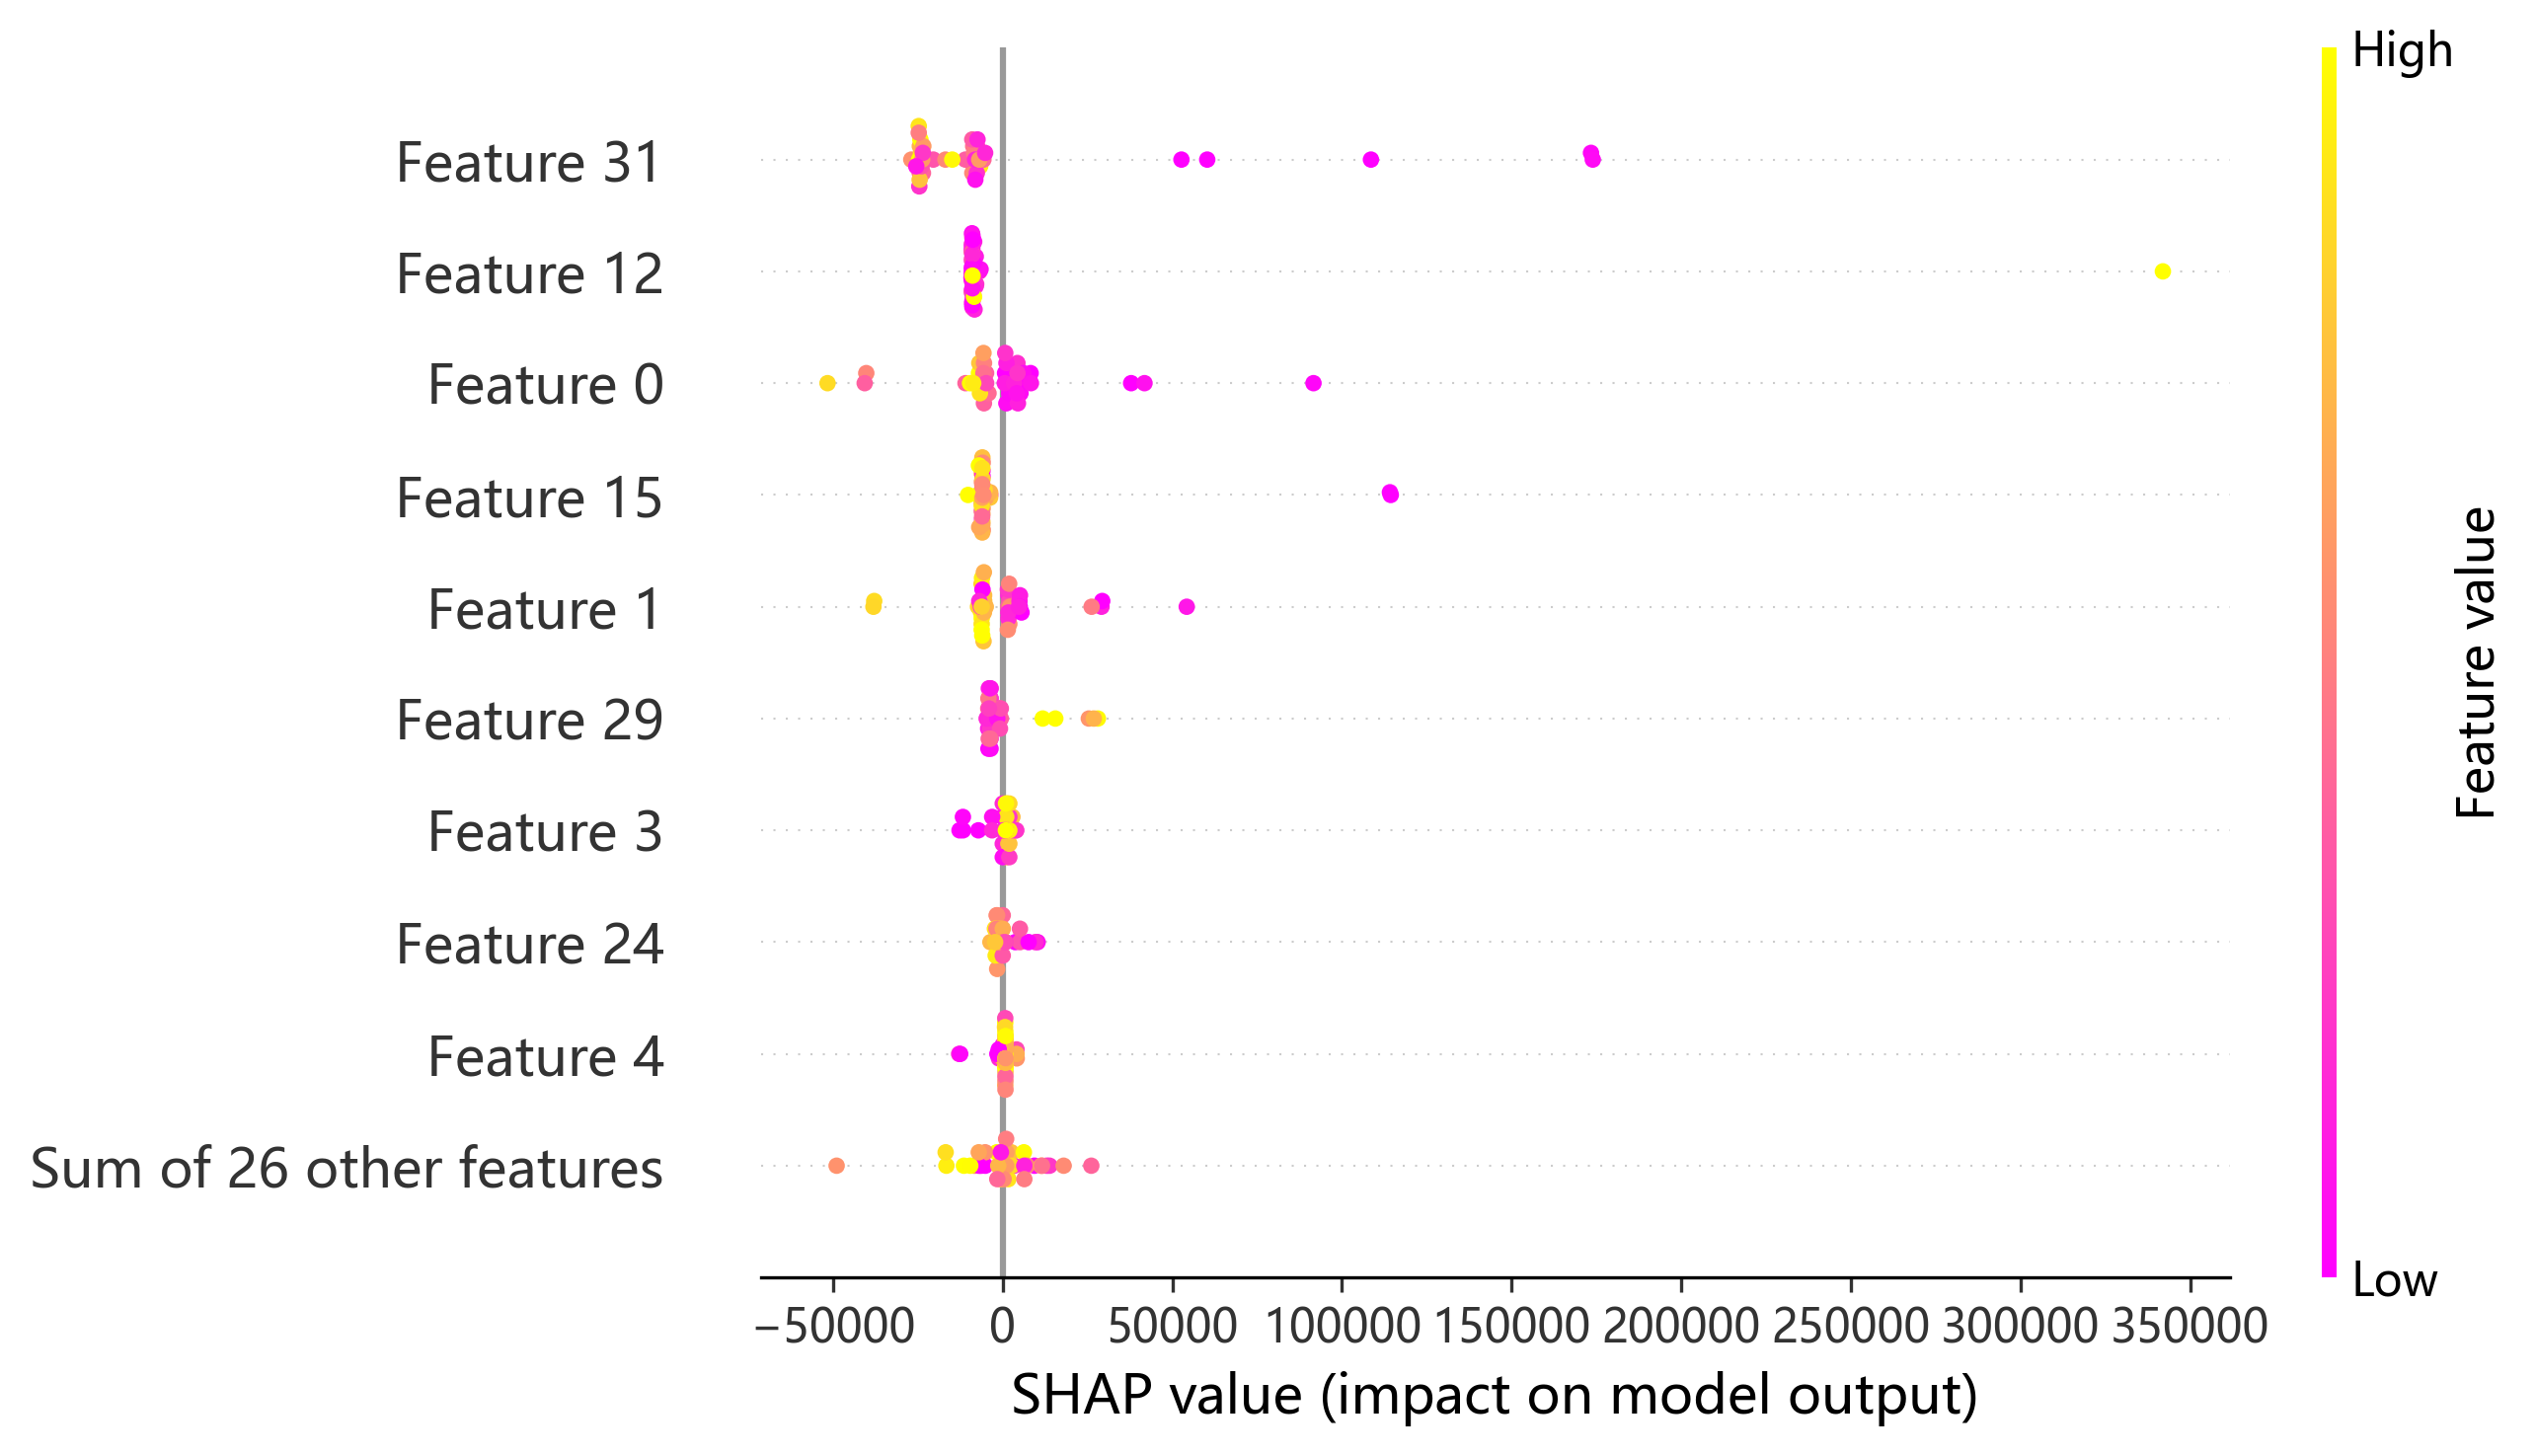

In [107]:
#模型可解释
shap.initjs()

xgbgs=xgboost.XGBRegressor(random_state=22,max_depth=10,n_estimators=1000)
xgbgs.fit(x_train,y_train.values[::,0])
    # plt.figure(figsize=(20,12),dpi=300)
explainer = shap.KernelExplainer(xgbgs.predict,x_train)
shap_values = explainer(x_train)

plt.figure(dpi=300,figsize=(20,20))  
plt.rcParams.update({"font.size":16,"font.style":"normal","font.weight":"normal"})
shap.plots.beeswarm(shap_values,show=False,color=plt.get_cmap("spring"))

# plt.xlabel("SHAP value (impact on model output)",fontsize=28,fontweight="bold")

# plt.legend(fontsize=28)
# plt.ylabel(fontsize=24)

# sns.palplot(sns.color_palette("Accent"))
# plt.show()
plt.savefig("foram/reads_xgb.pdf",bbox_inches = 'tight')

  0%|          | 0/40 [00:00<?, ?it/s]

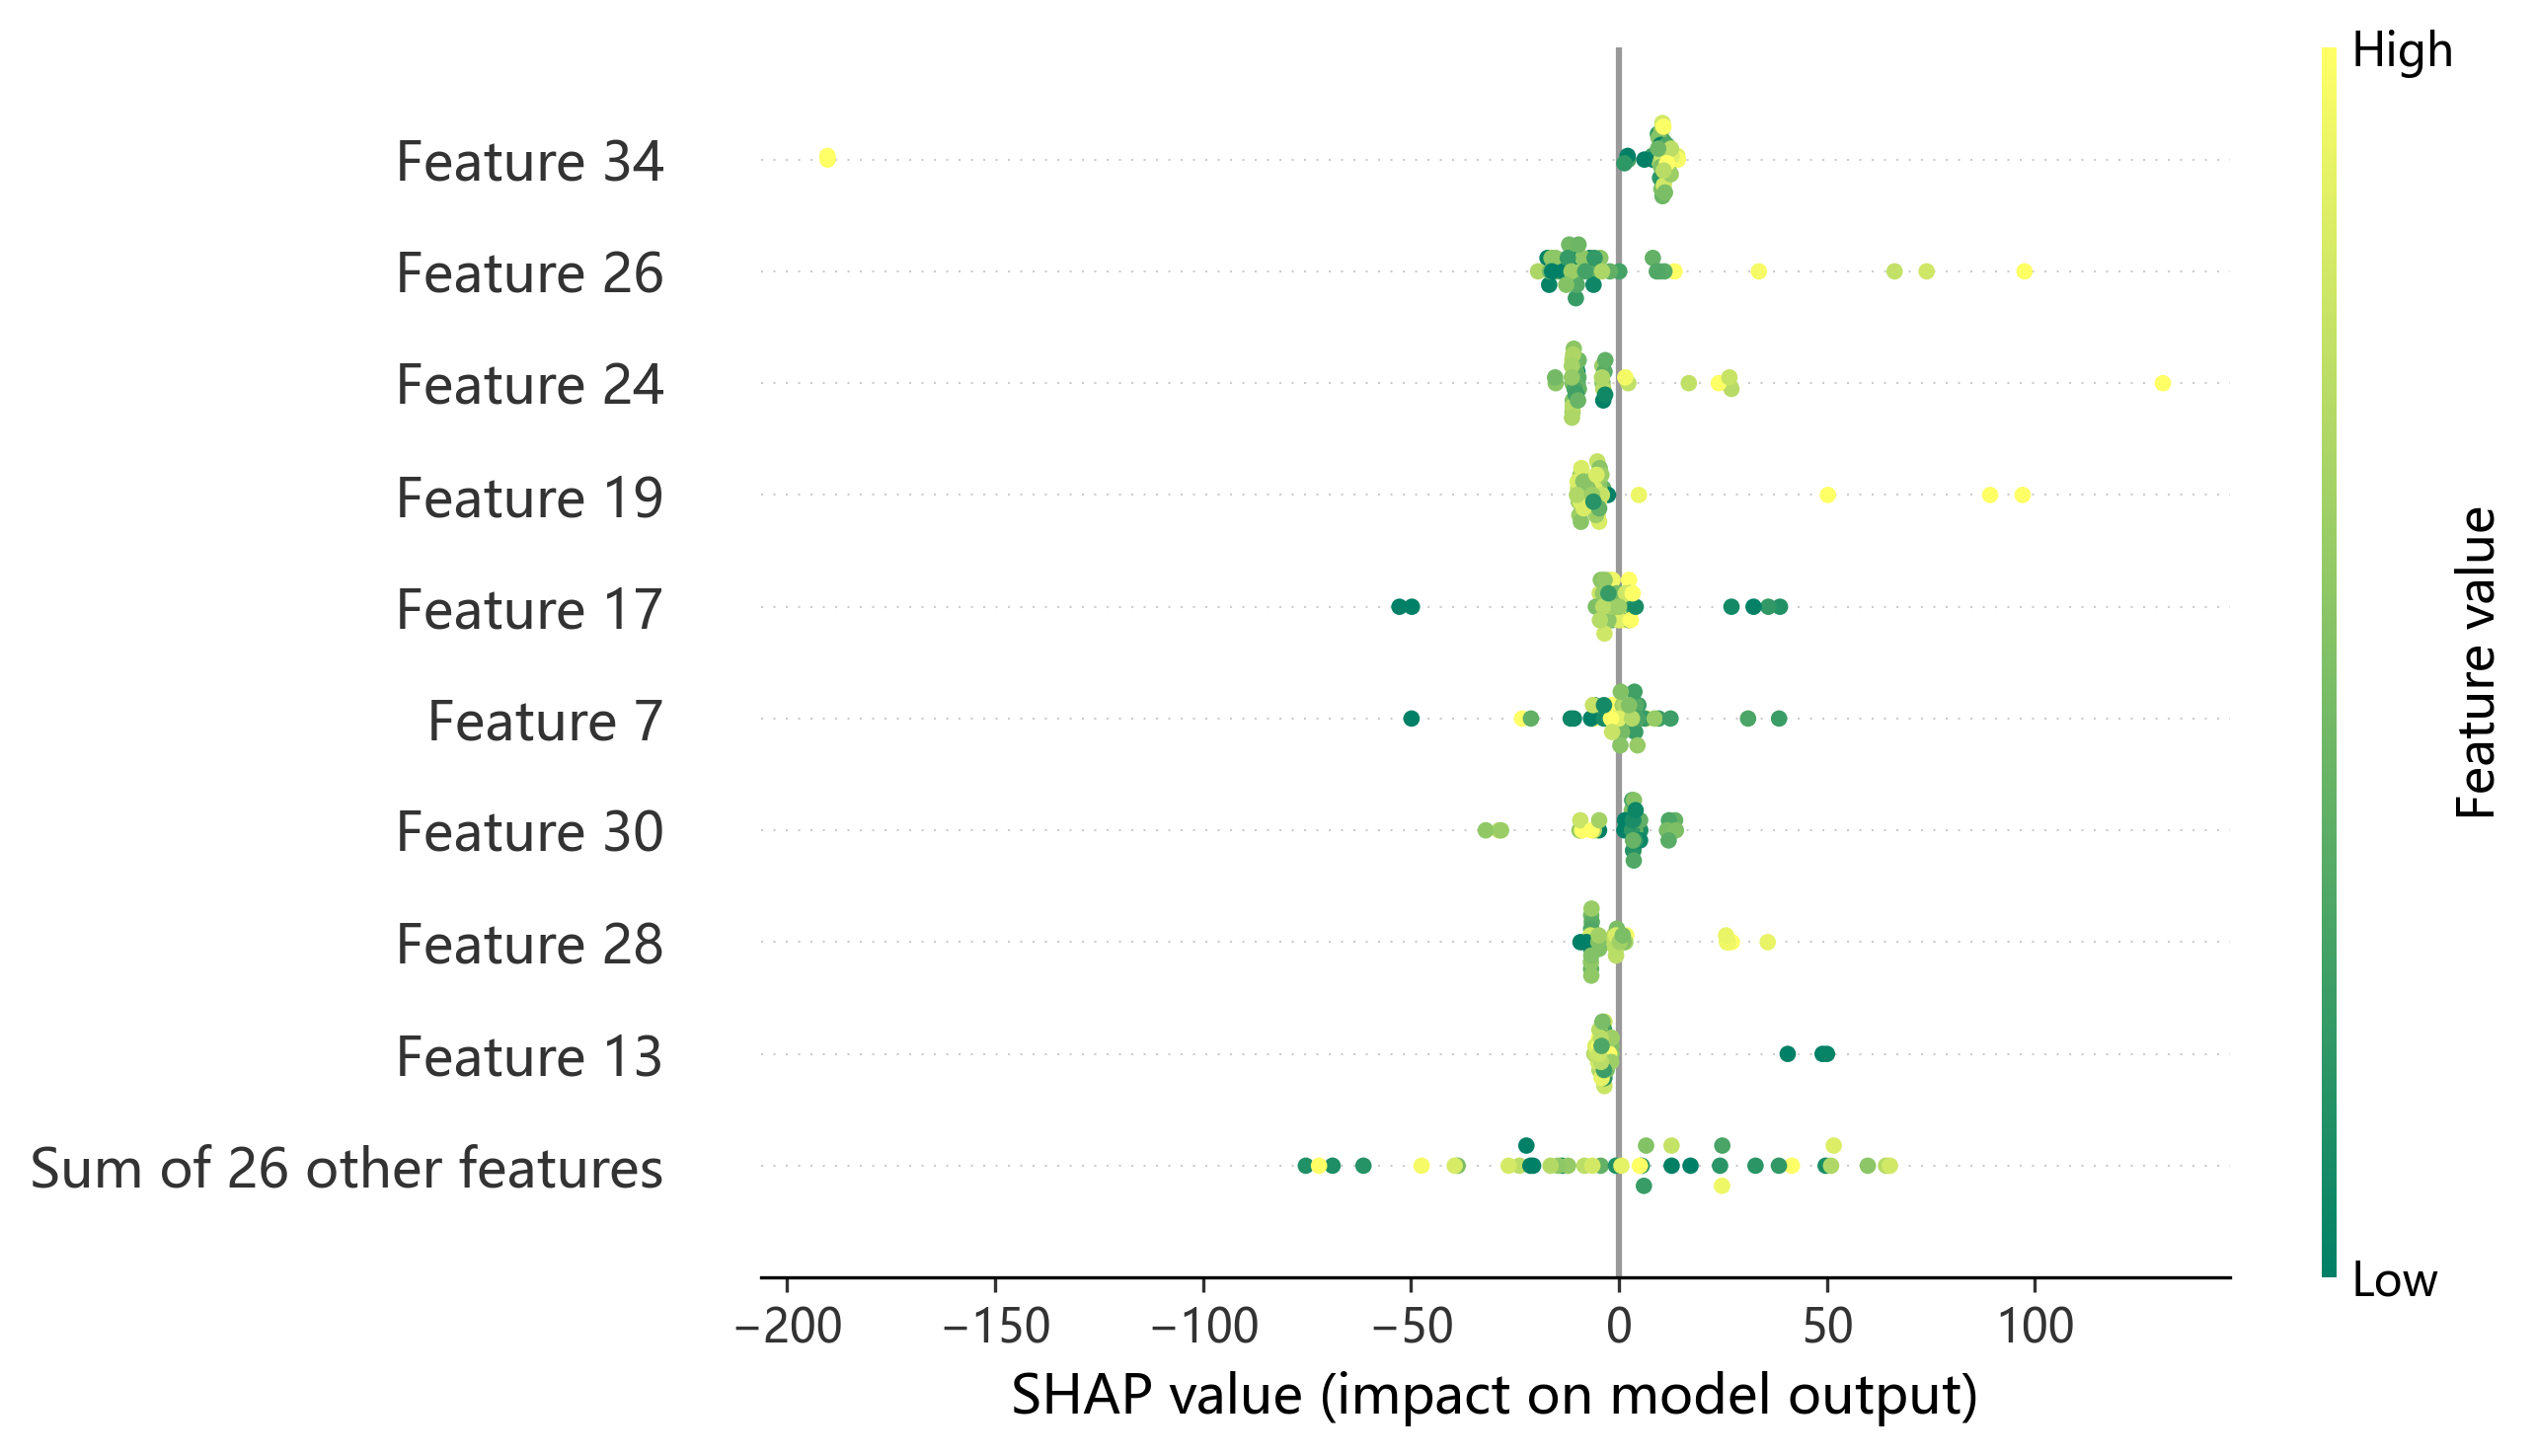

In [111]:
#模型可解释
shap.initjs()
xgbgs=xgboost.XGBRegressor(random_state=22,max_depth=10,n_estimators=1000)
xgbgs.fit(x_train,y_train.values[::,1])
    # plt.figure(figsize=(20,12),dpi=300)
explainer = shap.KernelExplainer(xgbgs.predict,x_train)
shap_values = explainer(x_train)
plt.figure(dpi=300,figsize=(20,20))  
plt.rcParams.update({"font.size":16,"font.style":"normal","font.weight":"normal"})
shap.plots.beeswarm(shap_values,show=False,color=plt.get_cmap("summer"))

# plt.xlabel("SHAP value (impact on model output)",fontsize=28,fontweight="bold")

# plt.legend(fontsize=28)
# plt.ylabel(fontsize=24)

# sns.palplot(sns.color_palette("Accent"))
# plt.show()
plt.savefig("foram/OTUs_xgb.pdf",bbox_inches = 'tight')

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 693
[LightGBM] [Info] Number of data points in the train set: 40, number of used features: 35
[LightGBM] [Info] Start training from score 5.928524
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

  0%|          | 0/40 [00:00<?, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_sa

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_sa

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_samples_leaf=2 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] min_data_in_leaf is set=2, min_sa

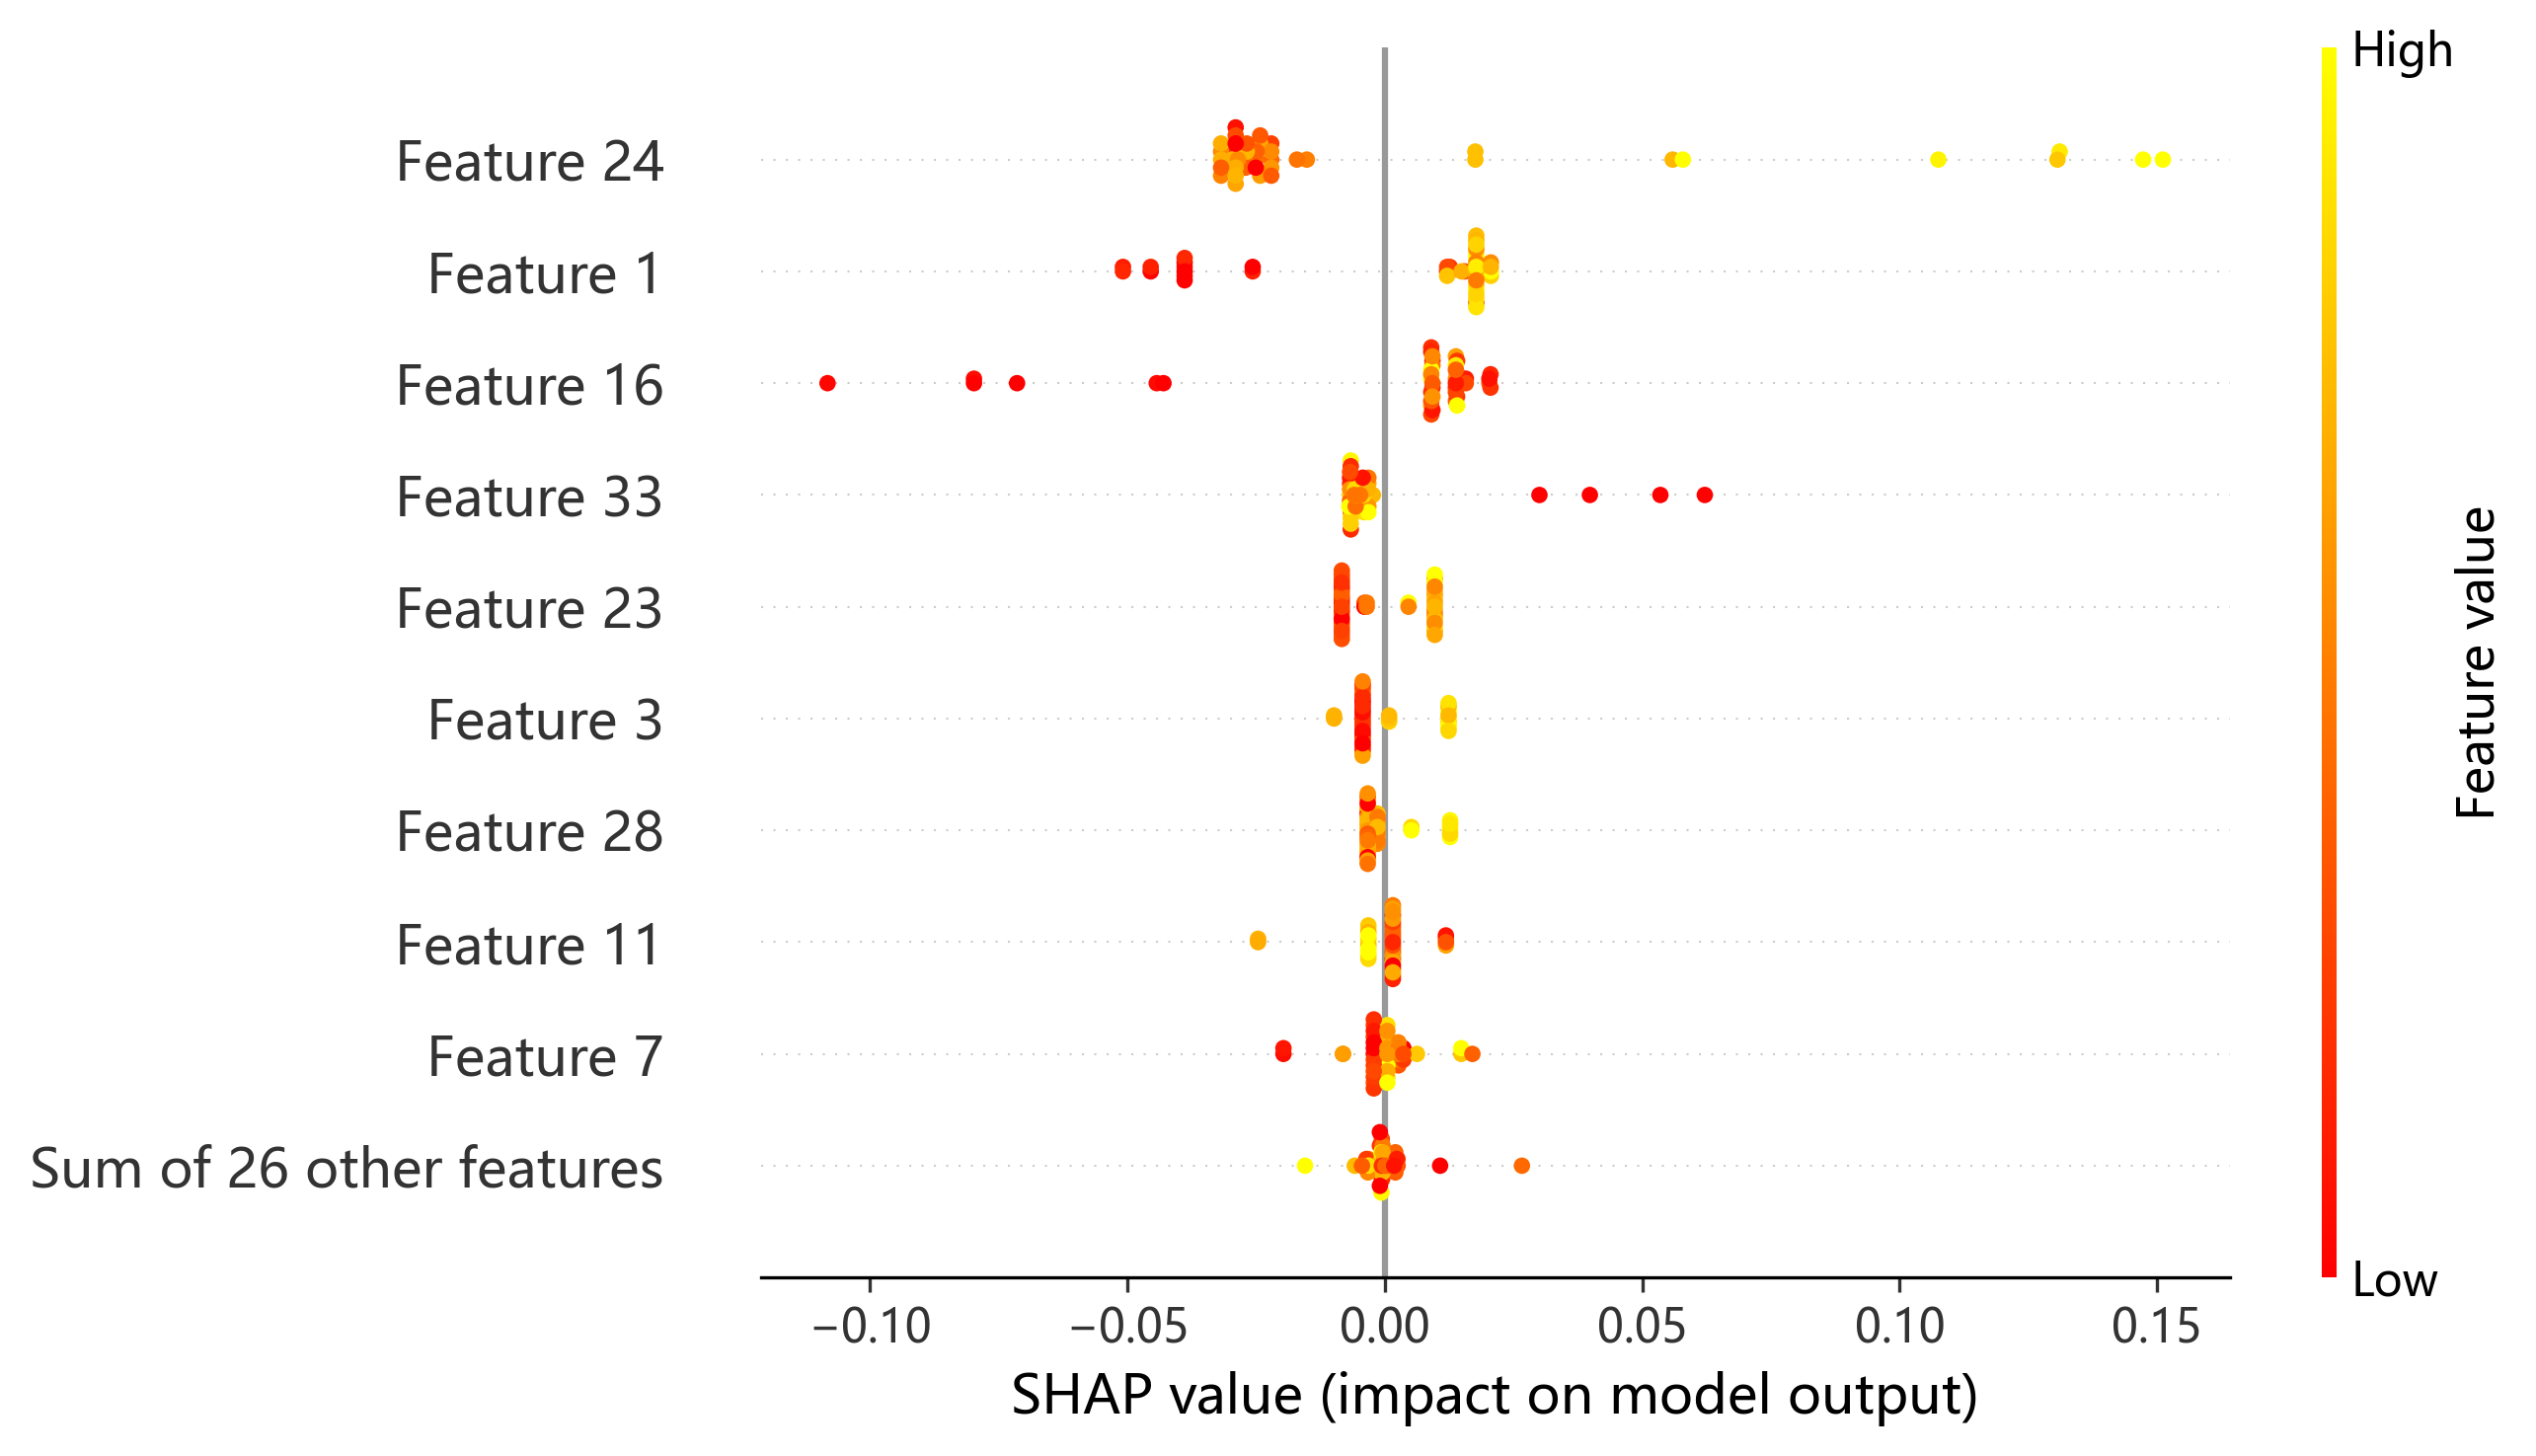

In [118]:
#模型可解释
shap.initjs()
gbmgs=lightgbm.LGBMRegressor(random_state=22,min_samples_leaf=2,
                           min_data_in_bin=2,
                           min_data_in_leaf=2,
                             n_estimators=50,
                             learning_rate=0.01,
                             max_depth=2)

gbmgs.fit(x_train,y_train.values[::,2])
# plt.figure(figsize=(20,12),dpi=300)
def my_predict(data):    
    y_pred=gbmgs.predict(data)
    return y_pred
explainer = shap.KernelExplainer(my_predict,x_train)
shap_values = explainer(x_train)
plt.figure(dpi=300,figsize=(20,20))  
plt.rcParams.update({"font.size":16,"font.style":"normal","font.weight":"normal"})
shap.plots.beeswarm(shap_values,show=False,color=plt.get_cmap("autumn"))

# plt.xlabel("SHAP value (impact on model output)",fontsize=28,fontweight="bold")

# plt.legend(fontsize=28)
# plt.ylabel(fontsize=24)

# sns.palplot(sns.color_palette("Accent"))
# plt.show()
plt.savefig("foram/shannon_lgbm.pdf",bbox_inches = 'tight')

  0%|          | 0/40 [00:00<?, ?it/s]

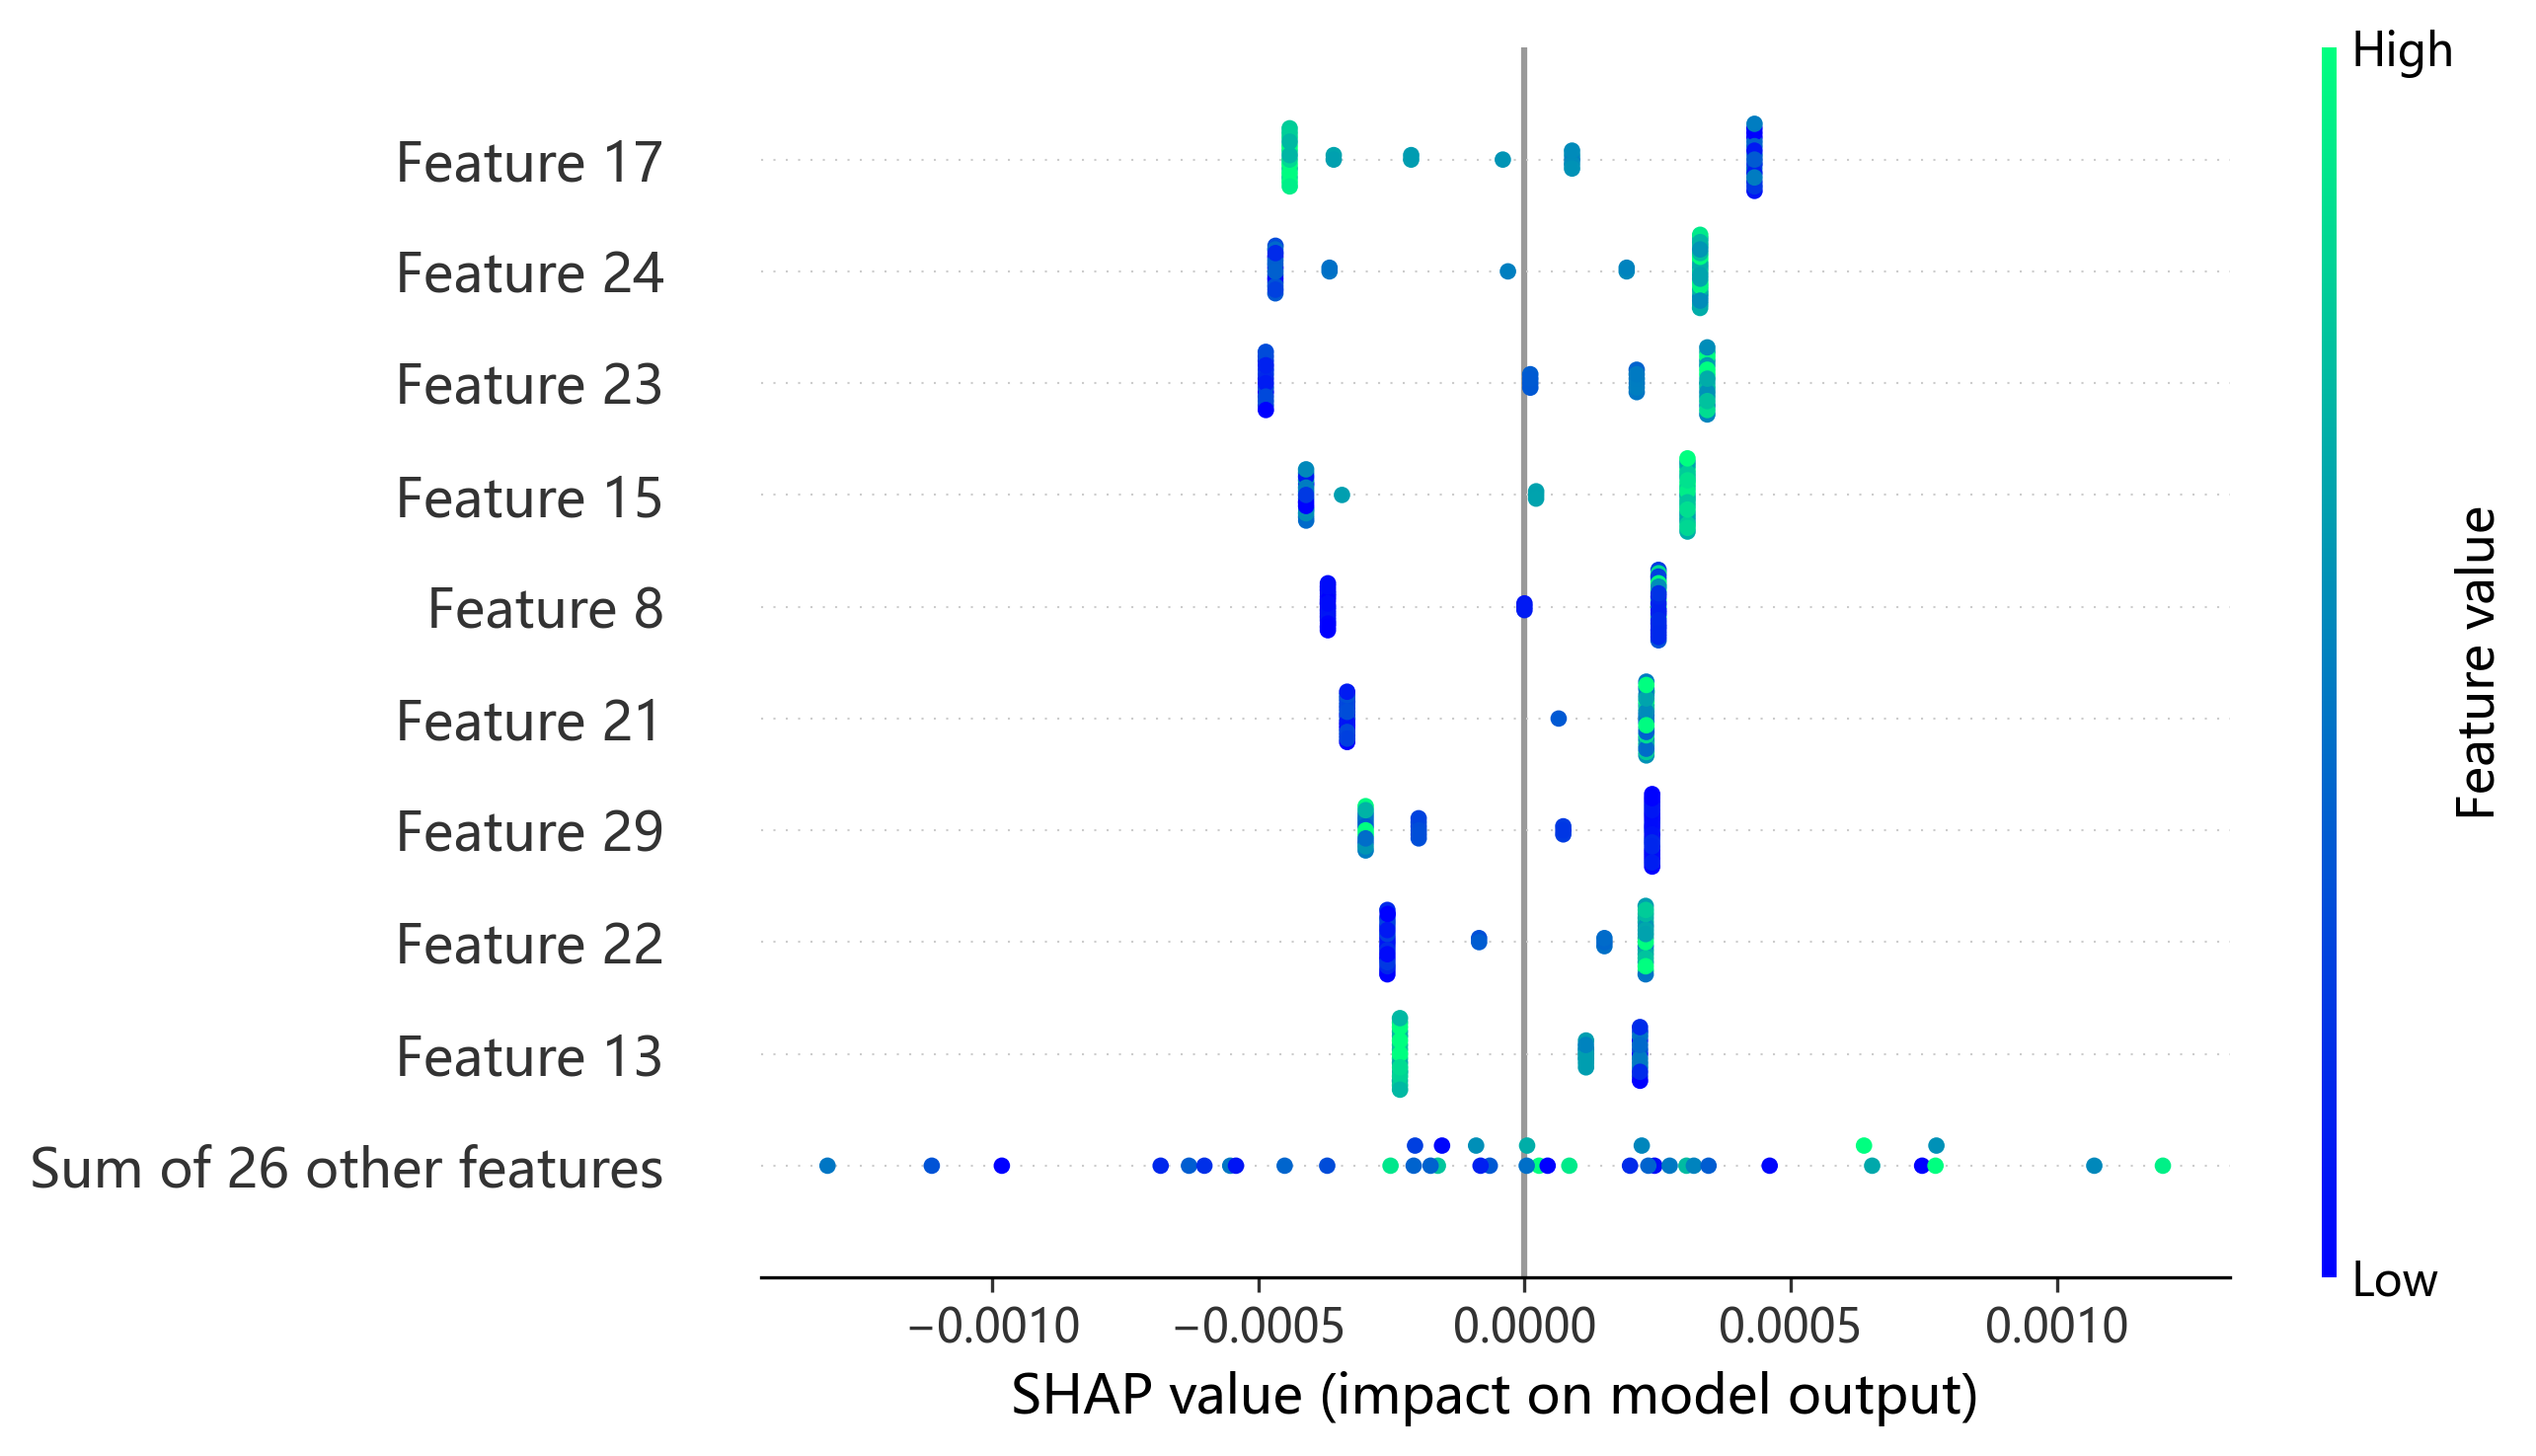

In [119]:
#模型可解释
shap.initjs()
rfgs=RandomForestRegressor(random_state=22,bootstrap=True,max_depth=5,max_features="sqrt",min_samples_leaf=10,min_samples_split=10,n_estimators=100)
rfgs.fit(x_train,y_train.values[::,3])
explainer = shap.KernelExplainer(rfgs.predict,x_train)
shap_values = explainer(x_train)
plt.figure(dpi=300,figsize=(20,20))  
plt.rcParams.update({"font.size":16,"font.style":"normal","font.weight":"normal"})
shap.plots.beeswarm(shap_values,show=False,color=plt.get_cmap("winter"))

# plt.xlabel("SHAP value (impact on model output)",fontsize=28,fontweight="bold")

# plt.legend(fontsize=28)
# plt.ylabel(fontsize=24)

# sns.palplot(sns.color_palette("Accent"))
# plt.show()
plt.savefig("foram/simpson_rf.pdf",bbox_inches = 'tight')

  0%|          | 0/40 [00:00<?, ?it/s]

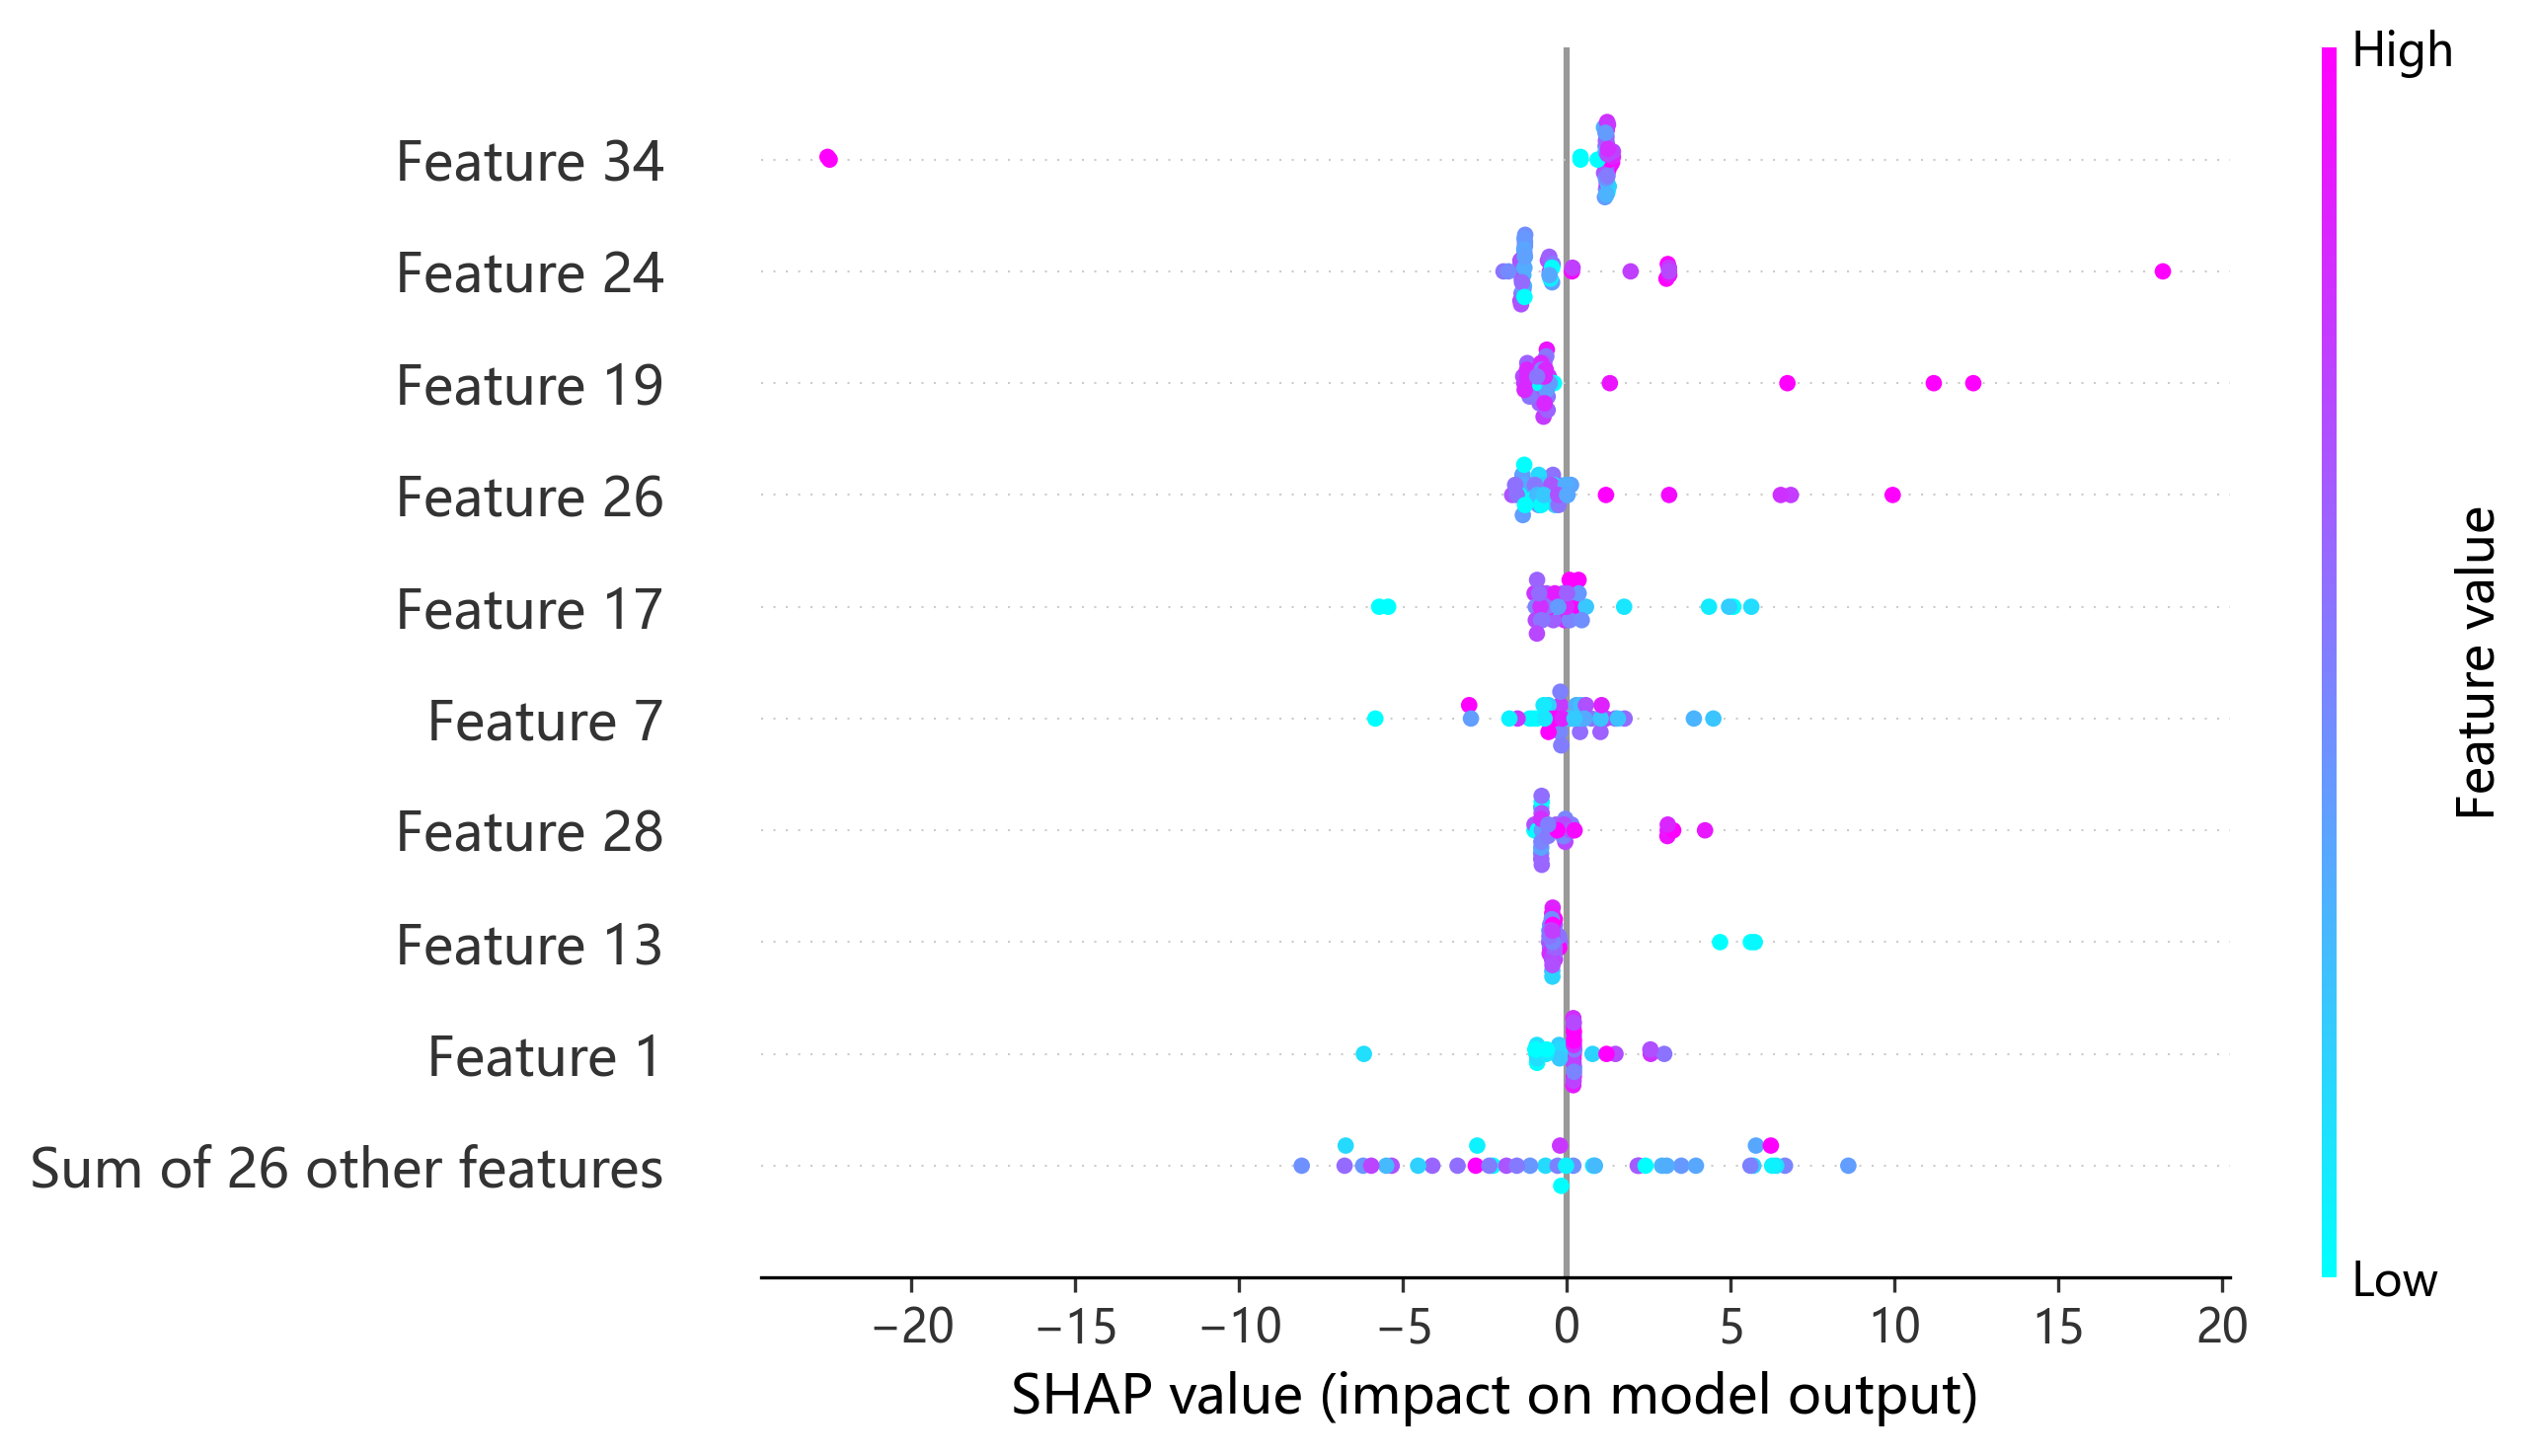

In [120]:
#模型可解释
shap.initjs()
xgbgs=xgboost.XGBRegressor(random_state=22,max_depth=10,n_estimators=1000)
xgbgs.fit(x_train,y_train.values[::,4])
    # plt.figure(figsize=(20,12),dpi=300)
explainer = shap.KernelExplainer(xgbgs.predict,x_train)
shap_values = explainer(x_train)
plt.figure(dpi=300,figsize=(20,20))  
plt.rcParams.update({"font.size":16,"font.style":"normal","font.weight":"normal"})
shap.plots.beeswarm(shap_values,show=False,color=plt.get_cmap("cool"))

# plt.xlabel("SHAP value (impact on model output)",fontsize=28,fontweight="bold")

# plt.legend(fontsize=28)
# plt.ylabel(fontsize=24)

# sns.palplot(sns.color_palette("Accent"))
# plt.show()
plt.savefig("foram/margalef_xgb.pdf",bbox_inches = 'tight')

In [121]:
joblib.dump(xgbgs,"foram/xgbgs.pkl")

['foram/xgbgs.pkl']

In [122]:
joblib.dump(xgbpca,"foram/xgbpca.pkl")

['foram/xgbpca.pkl']

In [123]:
joblib.dump(rfgs,"foram/rfgs.pkl")

['foram/rfgs.pkl']

In [124]:
joblib.dump(rfgspca,"foram/rfpca.pkl")

['foram/rfpca.pkl']

In [125]:
joblib.dump(gbmgs,"foram/gbmgs.pkl")

['foram/gbmgs.pkl']

In [126]:
joblib.dump(gbmpca,"foram/gbmpca.pkl")

['foram/gbmpca.pkl']